In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [129]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.508662  1.041634  1.593823  2.148181   
1      hashing_cerrado_lineal  0.373515  0.768502  1.190035  1.616352   
2  hashing_cerrado_cuadratico  0.364269  0.744984  1.159044  1.589724   
3       hashing_cerrado_doble  0.370046  0.758513  1.182784  1.624509   
4          std::unordered_map  0.396651  0.789031  1.238939  1.606508   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.661024  3.167233  3.708250  4.244178  4.801926  ...  5.894506  6.488132   
1  2.014717  2.409163  2.797485  3.178656  3.580255  ...  4.332960  4.727522   
2  1.988745  2.390555  2.789343  3.170223  3.555728  ...  4.303872  4.697655   
3  2.034441  2.457521  2.859423  3.245220  3.652772  ...  4.411713  4.821412   
4  1.966884  2.539108  2.899273  3.251082  3.646711  ...  4.829753  5.207554   

      13000     14000     15000     16000     17000     18000      19000  \
0  7

In [130]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')

df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

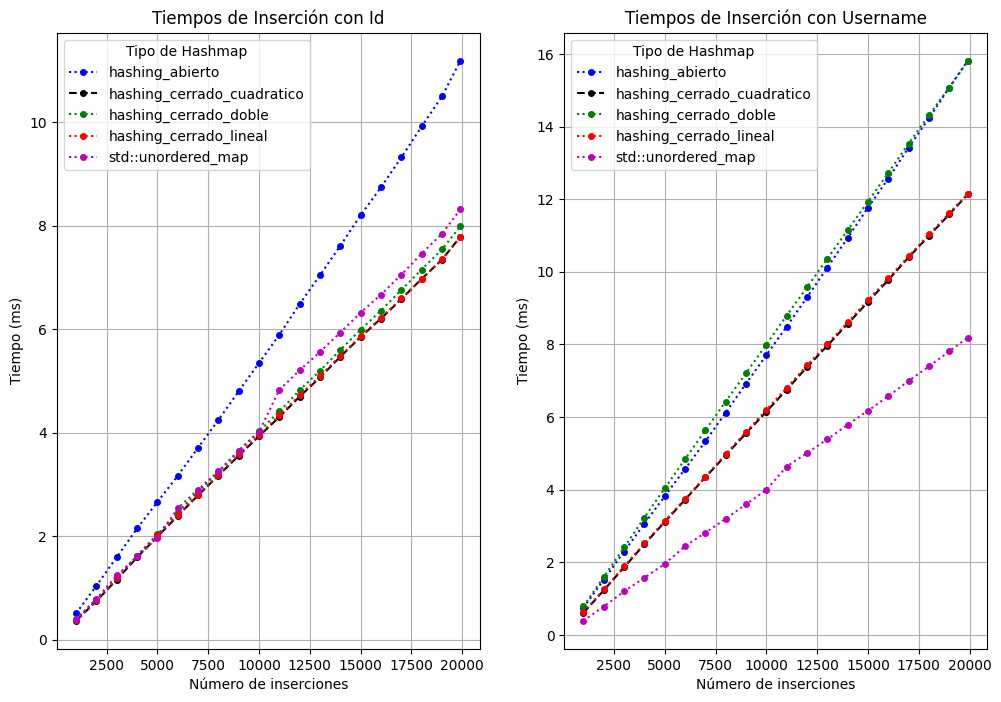

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [132]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.183799  0.366366  0.553829  0.757873   
1      hashing_cerrado_lineal  0.057033  0.110894  0.165041  0.219729   
2  hashing_cerrado_cuadratico  0.056018  0.109841  0.162547  0.218065   
3       hashing_cerrado_doble  0.067774  0.132563  0.199014  0.262528   
4          std::unordered_map  0.146911  0.296326  0.446365  0.593818   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.968290  1.196976  1.428392  1.692299  1.927875  ...  2.465504  2.733189   
1  0.275074  0.329367  0.382288  0.439210  0.495559  ...  0.609935  0.658652   
2  0.271458  0.323484  0.380152  0.430256  0.482917  ...  0.594254  0.649886   
3  0.330730  0.395902  0.458930  0.525037  0.588801  ...  0.719265  0.784819   
4  0.744959  0.908963  1.070213  1.291395  1.463023  ...  1.849156  2.015819   

      13000     14000     15000     16000     17000     18000     19000  \
0  2.

In [133]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')

print(df_id_melted.head())

df_id_melted['busquedas'] = df_id_melted['busquedas'].astype(int)
df_usr_melted['busquedas'] = df_usr_melted['busquedas'].astype(int)

                         mapa busquedas    tiempo
0             hashing_abierto      1000  0.183799
1      hashing_cerrado_lineal      1000  0.057033
2  hashing_cerrado_cuadratico      1000  0.056018
3       hashing_cerrado_doble      1000  0.067774
4          std::unordered_map      1000  0.146911


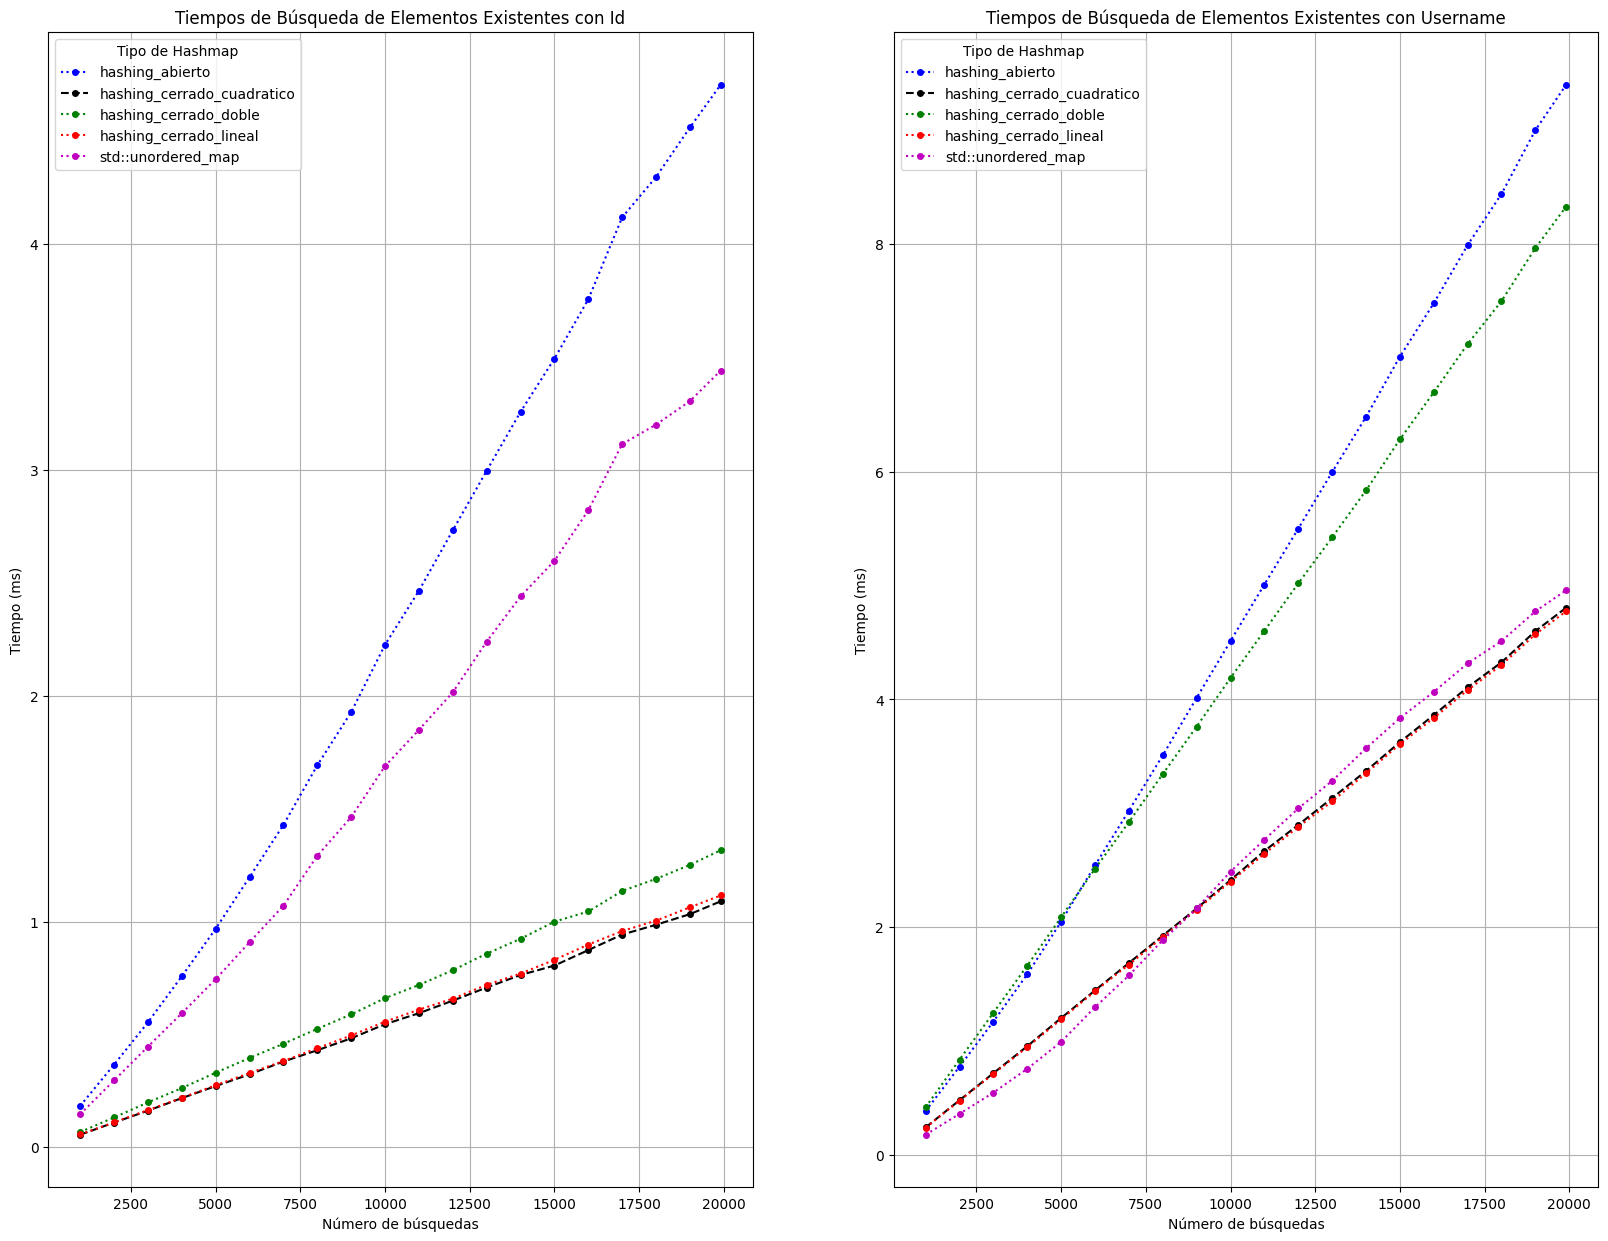

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [135]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.082387  0.161146  0.241882  0.321357   
1      hashing_cerrado_lineal  0.057012  0.111355  0.165794  0.220198   
2  hashing_cerrado_cuadratico  0.056355  0.109611  0.162281  0.216807   
3       hashing_cerrado_doble  0.067681  0.132944  0.198230  0.263998   
4          std::unordered_map  0.136379  0.270262  0.403490  0.536542   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.401986  0.483563  0.569073  0.643943  0.729807  ...  0.892564  1.002121   
1  0.274851  0.329160  0.385372  0.435983  0.492403  ...  0.595610  0.657192   
2  0.271618  0.324216  0.378096  0.428342  0.484260  ...  0.584945  0.646771   
3  0.327987  0.393924  0.459369  0.520656  0.587846  ...  0.711075  0.785170   
4  0.672090  0.802261  0.941933  1.069290  1.214283  ...  1.470407  1.639587   

      13000     14000     15000     16000     17000     18000     19000  \
0  1.

In [136]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')

df_id_melted['busquedas'] = df_id_melted['busquedas'].astype(int)
df_usr_melted['busquedas'] = df_usr_melted['busquedas'].astype(int)

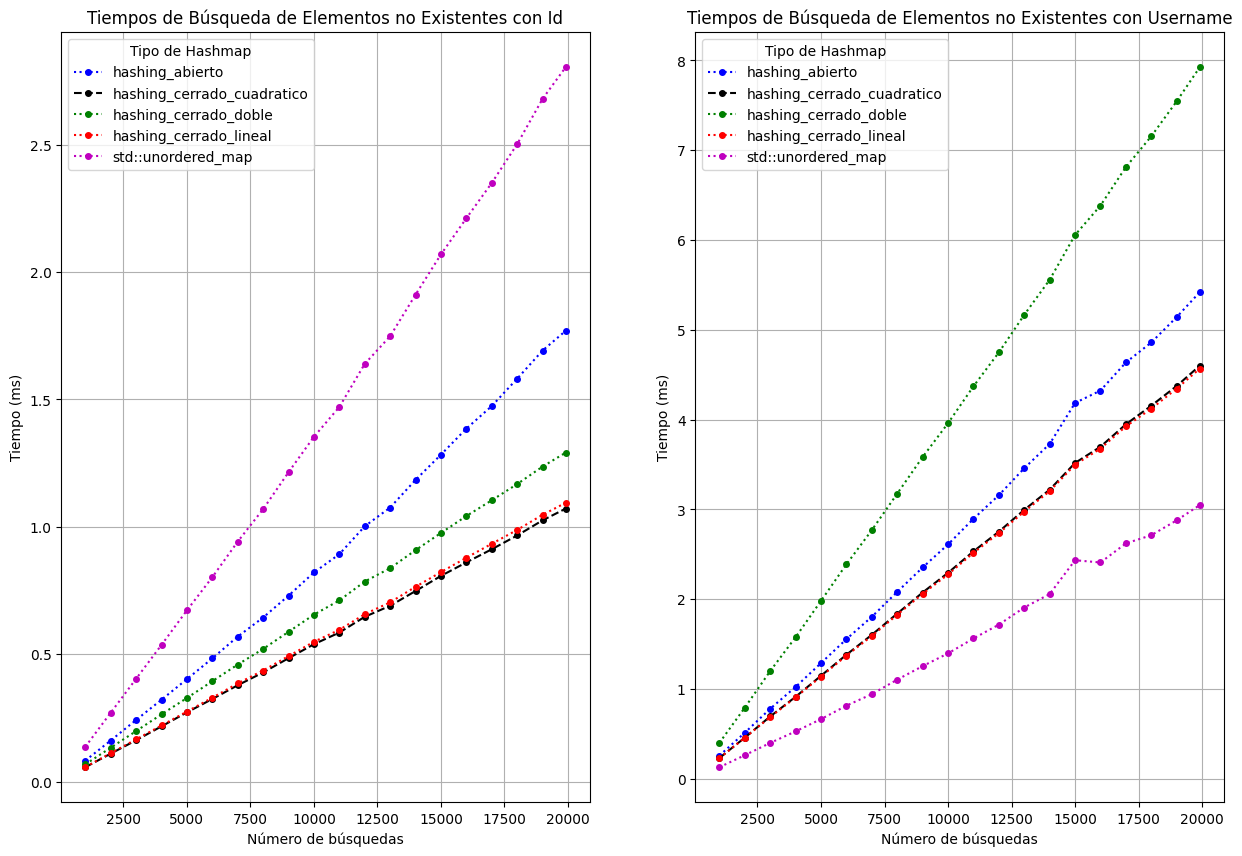

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()